In [1]:
!pip install nbdev
!pip install fastbook


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached fastbook-0.0.29-py3-none-any.whl (719 kB)
  Using cached fastai-2.7.12-py3-none-any.whl (233 kB)
  Using cached ipywidgets-7.7.5-py2.py3-none-any.whl (123 kB)
  Using cached fastdownload-0.0.7-py3-none-any.whl (12 kB)
  Using cached torchvision-0.15.2-cp311-cp311-win_amd64.whl (1.2 MB)
  Using cached spacy-3.6.0-cp311-cp311-win_amd64.whl (12.3 MB)
  Using cached widgetsnbextension-3.6.4-py2.py3-none-any.whl (1.6 MB)
  Using cached preshed-3.0.8-cp311-cp311-win_amd64.whl (91 kB)
  Using cached thinc-8.1.10-cp311-cp311-win_amd64.whl (1.5 MB)
  Using cached srsly-2.4.6-cp311-cp311-win_amd64.whl (478 kB)
  Using cached pathy-0.10.2-py3-none-any.whl (48 kB)
  Using cached confection-0.1.0-py3-none-any.whl (34 kB)
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 4.0.7
    Uninstalling widgetsnbextension-4.0.7:
      Successfully uninstalled widgetsnbextension-4.0.7
  Attempting uninstall: ipywidgets
    Found existing installation:


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from fastbook import *

In [4]:
urls = search_images_ddg('bird photos',max_images=1)
len(urls),urls[0]

(1, 'https://cdn.birdwatchingdaily.com/2016/07/Mockingbird-bst.jpg')

In [5]:
dest = Path('bird.jpg')
if not dest.exists(): download_url(urls[0],dest,show_progress=False)

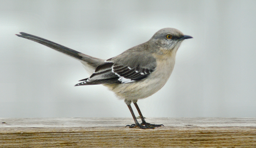

In [6]:
im = Image.open(dest)
im.to_thumb(256,256)

In [18]:
searches='forest','bird'
path=Path('bird_or_not/')

if not path.exists():
    for o in searches:
        dest = (path/o)
        dest.mkdir(parents=True,exist_ok=True)
        results = search_images_ddg(f'{o} photo')
        download_images(dest,urls=results[:200])
        resize_images(dest, max_size=400, dest=dest)

In [19]:
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)

(#4) [None,None,None,None]

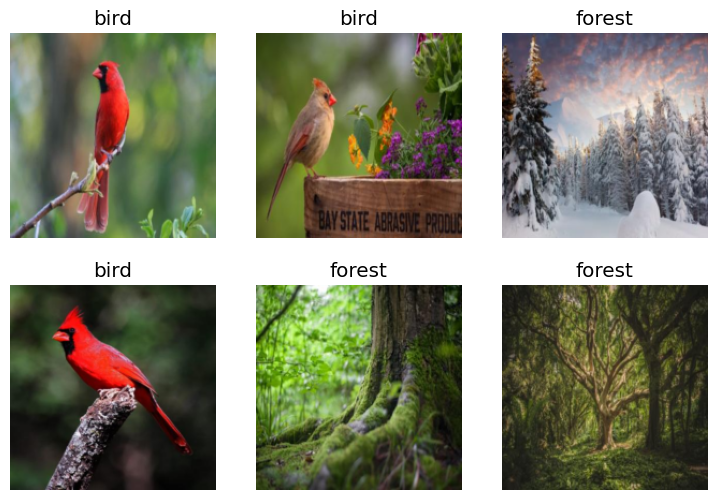

In [20]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192,method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [21]:
learn = cnn_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(3)

c:\Users\jordi\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
c:\Users\jordi\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\jordi\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://downloa

epoch,train_loss,valid_loss,error_rate,time
0,0.887677,0.601963,0.194030,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.057176,0.036793,0.014925,00:18
1,0.028820,0.000625,0.000000,00:17
2,0.020405,0.000114,0.000000,00:17
